In [1]:
import tensorflow as tf

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
x_train=x_train/255.0

In [4]:
x_test=x_test/255.0

In [5]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2924 - accuracy: 0.9148 - val_loss: 0.1373 - val_accuracy: 0.9600
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1412 - accuracy: 0.9580 - val_loss: 0.0947 - val_accuracy: 0.9724
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1039 - accuracy: 0.9682 - val_loss: 0.0850 - val_accuracy: 0.9736
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0858 - accuracy: 0.9733 - val_loss: 0.0781 - val_accuracy: 0.9756
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0741 - accuracy: 0.9770 - val_loss: 0.0771 - val_accuracy: 0.9767
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0666 - accuracy: 0.9789 - val_loss: 0.0724 - val_accuracy: 0.9777
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0589 - accuracy: 0.9811 - val_loss: 0.0703 - val_accuracy:

In [7]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0070 - accuracy: 0.9980
[0.006986414548009634, 0.9980000257492065]
313/313 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.9806
[0.07862511277198792, 0.9805999994277954]


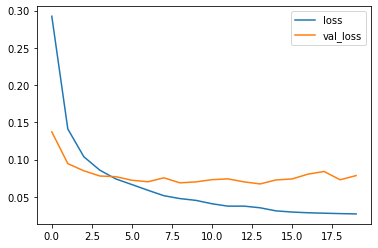

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

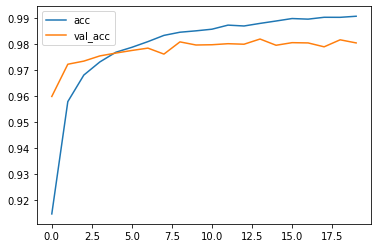

In [9]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [10]:
pred=model.predict(x_test)

In [11]:
import numpy as np
pred=np.round(pred).flatten()

In [12]:
pred_new=pred.reshape(-1,10)

In [13]:
pred_new.shape

(10000, 10)

In [14]:
y_test.shape

(10000,)

In [15]:
y_test[0]

7

In [16]:
pred_new[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
import itertools

Confusion matrix, without normalization
[[ 972    0    1    2    0    0    2    1    2    0]
 [   0 1123    2    1    0    0    2    0    7    0]
 [   3    1 1014    0    2    0    2    5    5    0]
 [   0    0    3  993    0    3    0    6    3    2]
 [   3    0    4    0  958    1    3    3    2    8]
 [   2    1    0    6    1  872    2    2    4    2]
 [   3    2    2    1    2    2  941    1    4    0]
 [   1    5    9    4    0    0    0 1002    3    4]
 [   3    1    5    4    2    2    1    3  950    3]
 [   1    3    1    5    4    2    0    8    4  981]]


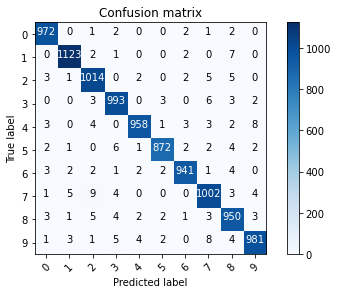

In [19]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

In [20]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [21]:
misclassified_idx = np.where(p_test != y_test)[0]

In [22]:
misclassified_idx

array([  61,  151,  241,  247,  321,  340,  381,  445,  447,  449,  495,
        582,  610,  619,  659,  684,  691,  707,  717,  720,  844,  882,
        947,  951,  965,  999, 1014, 1039, 1044, 1107, 1112, 1156, 1178,
       1224, 1226, 1232, 1247, 1260, 1299, 1319, 1326, 1328, 1337, 1393,
       1403, 1444, 1494, 1500, 1520, 1522, 1530, 1549, 1553, 1678, 1681,
       1709, 1717, 1737, 1751, 1790, 1800, 1850, 1878, 1901, 1941, 2004,
       2016, 2043, 2053, 2109, 2118, 2135, 2182, 2224, 2291, 2293, 2369,
       2387, 2406, 2414, 2462, 2488, 2597, 2635, 2654, 2771, 2836, 2907,
       2927, 2930, 2939, 2953, 2970, 3060, 3073, 3117, 3422, 3475, 3490,
       3503, 3520, 3558, 3597, 3662, 3751, 3776, 3808, 3838, 3853, 3906,
       3941, 3943, 3951, 4027, 4065, 4078, 4176, 4199, 4224, 4248, 4306,
       4443, 4500, 4536, 4571, 4731, 4761, 4807, 4823, 4860, 4861, 4880,
       4956, 5331, 5586, 5642, 5676, 5734, 5749, 5887, 5888, 5937, 5955,
       5973, 6011, 6035, 6059, 6065, 6166, 6555, 65

Text(0.5, 1.0, 'True label 3, Predicted label 5')

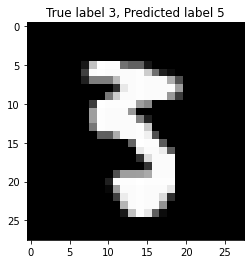

In [36]:
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label %s, Predicted label %s" % (y_test[i],p_test[i]))